# Modeling 
- Alcohol vs Sulphates
- Free sulfur dioxide vs Total sulfur dioxide
- Volatile acidity vs density
- Citric Acid vs pH

In [1]:
# normal imports
import final_wrangle as wr
import final_explore as ex

In [2]:
# imports for kmeans:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

from sklearn.preprocessing import MinMaxScaler

In [3]:
# import the wine datafram: 
df = wr.wine_df()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [5]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [6]:
# split the data into train validate and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

In [7]:
# drop column: 
del clean_df['wine_color']
del train['wine_color']
del validate['wine_color']
del test['wine_color']

In [8]:
# scale the data: 
to_scale = list(clean_df.columns)
train, validate, test = wr.scale_data(train, validate, test, to_scale)

# Cluster 1: 
- Alcohol vs Sulphates

In [9]:
X1 = train[['alcohol', 'sulphates']]
X1.head()

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X1)

#Use the thing:
kmeans.predict(X1)

array([2, 0, 1, ..., 2, 0, 0], dtype=int32)

In [10]:
# make a new column names cluster in train and X dataframe

train['cluster_1'] = kmeans.predict(X1)

X1['cluster_1'] = kmeans.predict(X1)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,0
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,1
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2


Cluster 1: Validate


<Axes: xlabel='alcohol', ylabel='sulphates'>

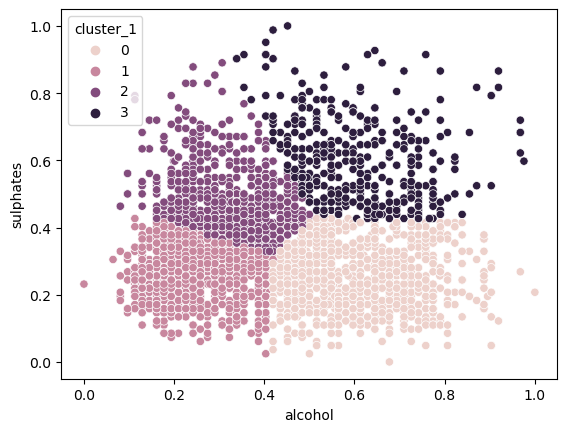

In [11]:
# visualize the clusters: 
sns.scatterplot(x = 'alcohol', y = 'sulphates', data = train, hue = 'cluster_1')

In [12]:
V1 = validate[['alcohol', 'sulphates']]

#use the thing:  
kmeans.predict(V1)

validate['cluster_1'] = kmeans.predict(V1)

#add columns
V1['cluster_1'] = kmeans.predict(V1)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,0
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,0
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,0


In [13]:
T1 = test[['alcohol','sulphates']]

#use the thing:
kmeans.predict(T1)

#add columns
test['cluster_1'] = kmeans.predict(T1)

T1['cluster_1'] = kmeans.predict(T1)

# Cluster 2: 
- Free sulfur dioxide vs Total sulfur dioxide

In [14]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,0
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,1
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2


In [15]:
X2 = train[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X2)

#Use the thing:
kmeans.predict(X2)

array([0, 1, 3, ..., 2, 0, 0], dtype=int32)

In [16]:
# add column to train
train['cluster_2'] = kmeans.predict(X2)

X2['cluster_2'] = kmeans.predict(X2)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,0,1
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,1,3
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,2
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0


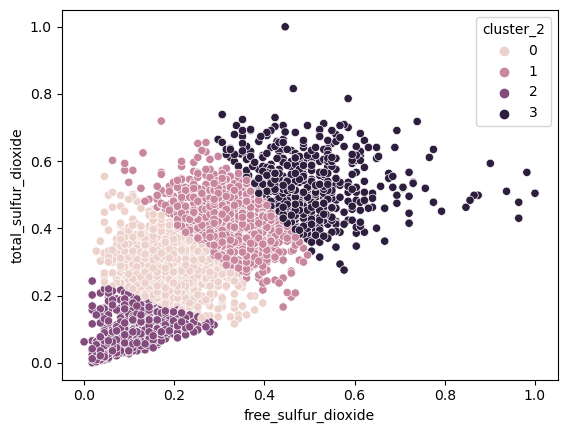

In [17]:
# visualize the clusters: 
sns.scatterplot(x = 'free_sulfur_dioxide', y = 'total_sulfur_dioxide', data = train, hue = 'cluster_2')
plt.show()

In [18]:
V2 = validate[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#use the thing:  
kmeans.predict(V2)

validate['cluster_2'] = kmeans.predict(V2)

V2['cluster_2'] = kmeans.predict(V2)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,0,1
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,2
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,2
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,0,1
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,0,0


In [19]:
T2 = test[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#use the thing:
kmeans.predict(T2)

#add columns
test['cluster_1'] = kmeans.predict(T2)

T2['cluster_1'] = kmeans.predict(T2)

# Cluster 3: 
- Volatile acidity vs density

In [20]:
X3 = train[['volatile_acidity', 'density']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X3)

#Use the thing:
kmeans.predict(X3)

array([1, 3, 3, ..., 1, 2, 2], dtype=int32)

In [21]:
# add column to train
train['cluster_3'] = kmeans.predict(X3)

X3['cluster_3'] = kmeans.predict(X3)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0,1
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,0,1,3
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,1,3,3
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,2,0
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0,0


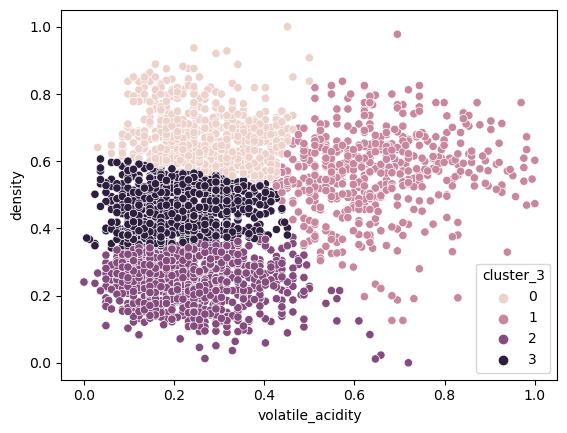

In [22]:
# visualize the clusters: 
sns.scatterplot(x = 'volatile_acidity', y = 'density', data = train, hue = 'cluster_3')
plt.show()

In [23]:
V3 = validate[['volatile_acidity','density']]

#use the thing:  
kmeans.predict(V3)

validate['cluster_3'] = kmeans.predict(V3)

V3['cluster_3'] = kmeans.predict(V3)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,0,1,2
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,2,1
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,2,1
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,0,1,2
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,0,0,2


In [24]:
T3 = test[['volatile_acidity', 'density']]

#use the thing:
kmeans.predict(T3)

#add columns
test['cluster_3'] = kmeans.predict(T3)

T3['cluster_3'] = kmeans.predict(T3)

# Cluster 4: 
- Citric Acid vs pH

In [25]:
X4 = train[['citric_acid', 'pH']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X4)

#Use the thing:
kmeans.predict(X4)

array([3, 2, 1, ..., 3, 1, 1], dtype=int32)

In [26]:
# add column to train
train['cluster_4'] = kmeans.predict(X4)

X4['cluster_4'] = kmeans.predict(X4)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3,cluster_4
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0,1,3
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,0,1,3,2
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,1,3,3,1
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,2,0,3
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0,0,3


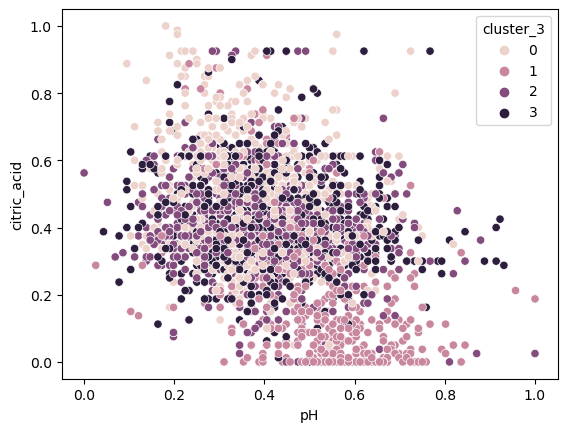

In [27]:
# visualize the clusters: 
sns.scatterplot(x = 'pH', y = 'citric_acid', data = train, hue = 'cluster_3')
plt.show()

In [28]:
V4 = validate[['citric_acid','pH']]

#use the thing:  
kmeans.predict(V4)

validate['cluster_4'] = kmeans.predict(V4)

V4['cluster_4'] = kmeans.predict(V4)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3,cluster_4
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,0,1,2,1
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,2,1,0
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,2,1,0
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,0,1,2,1
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,0,0,2,0


In [29]:
T4 = test[['citric_acid', 'pH']]

#use the thing:
kmeans.predict(T4)

#add columns
test['cluster_4'] = kmeans.predict(T4)

T3['cluster_4'] = kmeans.predict(T4)

# Modeling: 

In [30]:
#regresion: 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression, SequentialFeatureSelector

#statistical metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
# split data into X_train and Y_train

X_train = train.drop(columns = 'quality')
y_train = train['quality']

X_validate = validate.drop(columns= 'quality')
y_validate = validate['quality']

X_test = test.drop(columns = 'quality')
y_train = train['quality']

## Feature Engineering:
- What feautres are the best?
- What does RFE say is the best?

In [49]:
# MAKE the thing
kbest = SelectKBest(f_regression, k=4)

# FIT the thing
kbest.fit(X_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x297559d00>)

In [50]:
# statiscal f-value / featurer's scores:
kbest.scores_

array([2.54358278e+01, 1.98672800e+02, 2.78547273e+01, 7.54435342e+00,
       2.09274177e+02, 1.58880148e+01, 5.04068564e+00, 3.75025748e+02,
       2.18142379e+00, 1.59889831e+01, 8.14397978e+02, 4.45269507e+01,
       5.76786667e-01, 4.55222145e+01, 7.60727408e+01, 5.81845282e+01])

In [51]:
# p value: 
kbest.pvalues_

array([4.80952072e-007, 6.59772977e-044, 1.38854744e-007, 6.05112731e-003,
       4.31947016e-046, 6.85954683e-005, 2.48218543e-002, 2.15922501e-079,
       1.39776562e-001, 6.50484105e-005, 5.54113999e-161, 2.91179968e-011,
       4.47626557e-001, 1.76313036e-011, 4.18036633e-018, 3.06794013e-014])

In [52]:
# get the names of the features its looking at: 
kbest.feature_names_in_

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'is_white', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'],
      dtype=object)

In [53]:
# make it into a dataframe
kbest_results = pd.DataFrame(
                dict(p=kbest.pvalues_, f=kbest.scores_),
                                        index = X_train.columns)
kbest_results

,p,f
fixed_acidity,4.809521e-07,25.435828
volatile_acidity,6.597730e-44,198.672800
citric_acid,1.388547e-07,27.854727
residual_sugar,6.051127e-03,7.544353
chlorides,4.319470e-46,209.274177
free_sulfur_dioxide,6.859547e-05,15.888015
total_sulfur_dioxide,2.482185e-02,5.040686
density,2.159225e-79,375.025748
pH,1.397766e-01,2.181424
sulphates,6.504841e-05,15.988983


RFE

In [54]:
model = LinearRegression()

In [56]:
# MAKE the thing
rfe = RFE(model, n_features_to_select=4)

# FIT the thing
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [57]:
# Get feature ranking
# Selected features are assigned a rank 1

rfe.ranking_

array([ 4,  1, 10,  1,  8,  5,  7,  2,  3,  1,  1,  6, 11,  9, 13, 12])

In [58]:
pd.DataFrame(
{
    'rfe_ranking':rfe.ranking_
}, index = X_train.columns)

,rfe_ranking
fixed_acidity,4
volatile_acidity,1
citric_acid,10
residual_sugar,1
chlorides,8
free_sulfur_dioxide,5
total_sulfur_dioxide,7
density,2
pH,3
sulphates,1


In [63]:
model = LinearRegression()

# MAKE the thing
sfs = SequentialFeatureSelector(model, n_features_to_select=4)

# FIT the thing
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=4)

In [64]:
sfs.support_

array([False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False])

In [65]:
X_train_SFStransformed = pd.DataFrame(
                            sfs.transform(X_train),
                            index = X_train.index,
                            columns = X_train.columns[sfs.support_])

In [66]:
X_train_SFStransformed.head()

,volatile_acidity,residual_sugar,sulphates,alcohol
621,0.585366,0.110020,0.475610,0.225806
3092,0.317073,0.330059,0.182927,0.693548
5926,0.195122,0.298625,0.329268,0.241935
661,0.414634,0.039293,0.500000,0.161290
1140,0.390244,0.043222,0.512195,0.241935


# Back to Modeling: 